# Particle Physics - Neutrino Oscillations

 
## Universidade de Santiago 


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

February 2020

In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Mon Mar  1 17:08:17 2021


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2
 
# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats     as stats
import scipy.constants as units

plt.style.context('seaborn-colorblind');

*Objective:*

Show the evidences of neutrino oscillations.

Indicate the open quenstions and the future.

## Introduction

Neutrino mixing and oscillations were theoretically introduced in the 60 of XX century.

Davis' experiment persistently reported since 70's less solar neutrino flux that prediced by Bahcall's standard solar model SSM. That was know as the **Solar Neutrino Problem**.

In 1997 **Super-Kamiokande reported the firt evidence of atmospheric neutrino oscillations**.

Since them neutrino oscillation has been observed in acelerator and reactor neutrinos.

The current picture of neutrino oscillation with three neutrino flavor and masses is solid, but some incosistencies exist.

Neutrino oscillations are **the only evidence of Physics Beyond de SM**.

## The origin of neutrino oscillations

Pontecorvo was the first to introduce the concept of oscillations [1] in 1952.

Z. Maki, M. Nakagawa and S. Sakata introduced the concept of mixing between mass and flavour states [24] in 1962.

And again Pontecorvo associated neutrino mixing and oscillations [25] in 1967.


About the derivation of the probability formula:

The basic ingredients:

- Uncertainty in momentum at production and detection

- Coherence of mass eigen-states over macroscopic distances

Different derivations with the same result:

- quamtum mechanics with neutrinos as plane waves

- quantum mechanics with neutrinos as wave packets

- quantum field theory

See [lectures](https://arxiv.org/abs/1708.01046)


<img src="./imgs/nu_oscilations_diagram.png" width=600 align="center">

Neutrinos of a given flavour, $\nu_\alpha$ are produced via CC interactions.
    
They are a combination of neutrinos of given mass, related via a unitary matrix $U$

$$
| \nu_{\alpha} \rangle = \sum_{i} U_{\alpha i}^* \, | \nu_i \rangle 
$$

That propagate in time, $t$, as eigen-states of the free hamiltonian, $E_i = \sqrt{p^2 + m^2_i}$

$$
| \nu  (t) \rangle = \sum_{i} U_{\alpha i}^* \, e^{-i E_i t} \, | \nu_i \rangle
$$   




A neutrino, $\nu_\beta$, can now interact via CC with an amplitude:

$$
\mathcal{A}_{\alpha \beta}(t) = \langle \nu_\beta \, | \, \nu(t)  \rangle
$$
   

And probability

$$
P_{\alpha \beta}(t) = \left| \mathcal{A}_{\alpha  \beta}(t) \right|^2 =
\left| \sum_{i} U_{\beta i} U^*_{\alpha i} e^{-i E_i  t} \right |^2 
$$





Let's consider a 2 families case:

$$
\begin{pmatrix} \nu_\alpha \\ \nu_\beta \end{pmatrix}  = 
\begin{pmatrix} \cos \theta & \sin \theta \\ -\sin \theta & \cos \theta \end{pmatrix}
\begin{pmatrix} \nu_1 \\ \nu_2 \end{pmatrix}  
$$

The neutrino time evolution is:

$$
| \nu (t) \rangle = \cos \theta e^{-iE_1 t}| \nu_1 \rangle + \sin \theta e^{-iE_2 t}| \nu_2 \rangle 
$$

The Amplitude to detector a $\nu_\beta$ neutrino at time $t$ is (except for a global phase):

$$
\mathcal{A}_{\alpha \beta} = \langle \nu_\beta | \nu(t) \rangle
 = \cos \theta \sin \theta \, (e^{-i E_2 t} - e^{-i E_1 t}) = \sin 2 \theta \sin  \frac{E_2 - E_1}{2} t
$$

If we approximate $E_i \simeq p + \frac{m^2_i}{2 p}$ and with $t \to L$

$$
\frac{E_2 - E_1}{2} t = \frac{m^2_2 - m^2_1}{4 E} t \to \frac{\Delta m^2_{21} L}{4 E}
$$




Manipulating:

$$
\mathcal{A}_{\alpha \beta}(t) =
\cos \theta \sin \theta \, e^{-i \frac{E_2 + E_1}{2}}(e^{-i \frac{E_2 - E_1}{2} t} - e^{-i \frac{E_1 - E_2}{2}t})
$$

$$
\mathcal{A}_{\alpha \beta}(t) = - i e ^{-i \frac{E_2 + E_1}{2}}\sin 2 \theta \sin \frac{E_2 - E_1}{2} t
$$





The oscillation probability is:

$$
P_{\beta \alpha} = \sin^2 2 \theta \sin^2 \frac{\Delta m^2_{21} L}{4 E} 
$$

Where $\Delta m^2_{21} = m^2_2 - m^2_1$.

This probability depends on two nature parameters:

  - mixing angle, $\theta$. If $\theta = 0$ there is no oscillations. It controls the amplitude.

  - $\Delta m^2_{21}$. If neutrinos are mass degenerated, there is no oscillation. It controls the phase.
 


The probability depends on a detector parameter:

  - ratio E/L. Oscillation is maximum with $E/L = \Delta m^2/2 \pi$

We can expressed in units:

$$
\frac{\Delta m^2_{21} L }{4 E} = 1.27 \frac{\Delta m^2_{21}}{\mathrm{eV^2}} \frac{L}{\mathrm{km}} \frac{\mathrm{GeV}}{E}
$$

*question:* Draw the oscillation probability for $\Delta m^2_{21} = 2.5 \times 10^{-3}$ eV$^{2}$ and $\theta = \pi/4$ as a function of $L/E$



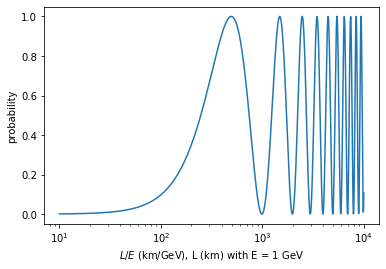

In [5]:
theta0, dm2_32 = np.pi/4., 2.5e-3 #  -, eV^2
def posc(L, E = 1., dm2 = dm2_32, theta = theta0):
    amp = np.sin(2 * theta) * np.sin( 1.27 * dm2 * L / E)
    return amp**2
ls = np.logspace(1, 4, 1000)
plt.plot(ls, posc(ls));
plt.xlabel(r'$L/E$ (km/GeV), L (km) with E = 1 GeV'); plt.ylabel('probability');
plt.xscale('log');  

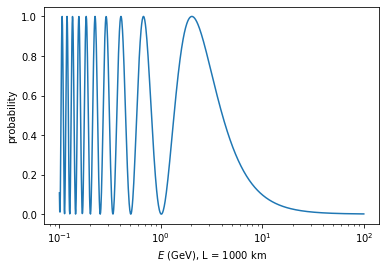

In [6]:
L  = 1000. # km
es = np.logspace(-1, 2, 1000)
plt.plot(es, posc(L, es));
plt.xscale('log'); plt.xlabel(r'$E$ (GeV), L = 1000 km'); plt.ylabel('probability');


<img src="./imgs/dm2_ranges.png" width=600 align="center">

Table with the energy, distance and $\Delta m^2$ ranges accesibles by experiments.

Long and Short Base Line (LBL, SBL) experimens.

*question:* Discuss the implications that the probability is invariance respect: $\pm \Delta m^2_{21}$ and $\theta \to \pi/2 - \theta$.

## Solar Neutrinos

<img src="./imgs/davis_experiment.png" width=500 align="center">


 - In 1946 Pontecorbo proposes the detecton of $\nu_e$ via $\nu_e \, ^{37}\mathrm{Cl} \to ^{37} \mathrm{Ar} \, e$, with 814 keV threshold
 
 - In 1962 J. Bahcall calculated the Solar Model [5]
 
 - In 1964 R. Davis at Homestake experiment [6]
 
    - 615 tons of $\mathrm{C}_2\mathrm{CH}_{14}$, 1 $\nu_e$ per day
    
    - deep undegroung (1600 m Homestake mine)
    
    - Filtered the tank and quemical processing, $\tau_{1/2} = 34.8$ d
    
 - Solar Neutrino Problem 
 
 - Nobel prize Davis and Koshiba in 2002.



### Solar Model

<img src="./imgs/solar_chains.png" width=600 align="center">

- During 1964-2005 J. Bahcall et al ellaborated the Standard Solar Model, SSM.

- They predic a neutrino flux for different reactiond etections: $pp, \mathrm{Be}, \mathrm{B}$



<img src="./imgs/solar_flux.png" width=600 align="center">

- Detector technique asre sensible to different energy ranges. Galium: $\nu_e \, ^{71}\mathrm{Ga} \to ^{71}\mathrm{Ge} \, e$, (thershold at 233 keV)



<img src="./imgs/solar_deficit_results.png" width=600 align="center">

- Homestake reported (1979-1994) 1/3 of the solar flux (SNU, 1 capture in 10$^{36}$ atoms) [7], to be compared with SSM latest predictions [8]

- Different solar deficit depending on the energy range. [9, 10, 11, 12]

<img src="./imgs/solar_experiments.png" width=800 align="center">


### [(Super)Kamiokande experiment](http://www-sk.icrr.u-tokyo.ac.jp/index-e.html)


<img src="./imgs/SK_drawing.png" width=400 align="center">

<img src="./imgs/SK_photo.png" width=400 align="center">


- Kamiokande-I, II (1987-1995) was 3 kton water detector, in Kamioka mine. 

- SuperKamiokande (1996-), 50 kton

- 50 cm PMTs to detect Cherenkov light. SuperKamiokande 11000 PMTs

- Neutrino elastic scattering (ES), $\nu_x \, e^- \to \nu_x \, e$ (CC and NC).


<img src="./imgs/SK_solar_flux.png" width=500 align="center">

- Correlation with the Solar direction. SK is a neutrino telescope.

- Less solar (B) flux than predicted: $(2.34 \pm 0.04) \times 10^6$ cm$^{-2}$s$^{-1}$ [[13]](https://arxiv.org/abs/1606.07538), with SSM $(5.46 \pm 0.66) \times 10^6$ cm$^{-2}$s$^{-1}$ [14]




### [SNO experiment](https://sno.phy.queensu.ca)


<img src="./imgs/SNO_photo.png" width=500 align="center">

 - Sudbury Neutrino Observatory 1999-2006, Canada.
 - 1 kton ultra-pure heavy water D$_2$O
 - Spherical acrylic veseel 12 m diameter. 9500 PMTs
 - Shield Water and 2000 m underground 
 


<img src="./imgs/SNO_event.png" width=500 align="center">

 - Measure Cherenkov light
 - ES (NC + CC) $\nu_x \, e \to \nu_x\, e$ (contributions: $\nu_\tau, \nu_\mu = 0.15 \nu_e$)
 - $\nu_e$ CC in D$_2$0: $\nu_e \, d \to e^- \, \, p$
 - $\nu_x$ NC: $\nu_x \, d \to \nu_x \, p \, n$, then $n \, ^2_1H \to ^3_1H \, \gamma$


<img src="./imgs/SNO_results.png" width=600 align="center">

SNO results [[16]](https://arxiv.org/abs/nucl-ex/0502021)



- In 2001, SNO reported the initial result of CC measurement [15], was an evidence of non-$\nu_e$ flux. In 2004 solar neutrino NC [16]

- From a combined result of three phases of SNO [17], the total flux of 8B solar neutrino is 
$(5.25 \pm 0.16^{+0.11}_{-0.14})$ cm$^{-2}$2s$^{-1}$, consistent with the SSM.

- Several solutions where possible combining all Solar experiment. 

- The solution of solar neutrino problem was the so-called large mixing angle (LMA) with parameters $\Delta m^2_{21} = 7.5 \times 10^{-5}$ eV$^2$ and $\sin^2 \theta \simeq 0.3$.



<img src="./imgs/solar_dm2_tan2theta.png" width=500 align="center">

### Neutrino oscillations in matter

<img src="./imgs/matter_effects_diagram.png" width=500 align="center">

Neutrinos can *coherence scatter* via NC in matter, but only $\nu_e$ can CC! (Mikheyev, Smirnov effect [20])

We can associate a potencial $V_e = \sqrt{2} G_F N_e$,



Where:
    
$$
V_e \sim 8 \times 10^{-14} \, f_e \, \rho  \;\; \mathrm{eV \; cm}^3/\mathrm{g}
$$

with:
$$
f_e = \frac{n_e}{n_p + n_n}
$$

And $\rho_{Earth} \sim 10$ g/cm$^3$, $\rho_{Sun} \sim 100$ g/cm$^3$

In the Sum, for $E_\nu \sim 1$ MeV, $f_e \sim 1/2$, 

$$
V_e = 4 \times 10 ^{-12} \; \mathrm{eV}
$$


We can associate a potencial $V_e = \sqrt{2} G_F N_e$ to coherence CC $\nu_e$ in matter with density of electrons, $N_e$.

The Hamiltonian:

$$
\mathcal{H} = U \mathcal{H_0}  U^T+ V_e
$$


Where $\mathcal{H_0}$ is the hamiltonian associated to propagation of $\nu_i$ in vacuum, and $V_e$ affects only to $\nu_e$.

The amplitude evolution is:

$$
i \frac{\partial \mathcal{A}_{\alpha}}{\partial t} = U \mathcal{H} U^T \mathcal{A}_{\alpha} 
$$

where $\alpha$ indicates neutrinos in flavour basis.


In two family and $H_0$, the free hamiltonian, except for common terms in the diagonal can be re-written:

$$
\mathcal{H}_0 = \begin{pmatrix} E_1 & 0 \\ 0 & E_2 \end{pmatrix} \to 
 p + \frac{1}{2p}  \begin{pmatrix} m^2_1 & 0 \\ 0 & m^2_2 \end{pmatrix} \to
 \frac{1}{2E}\begin{pmatrix} m^2_1 & 0 \\ 0 & m^2_2 \end{pmatrix} \to 
 \frac{1}{4E} \begin{pmatrix}  - \Delta m^2_{21}& 0 \\ 0 & \Delta m^2_{21} \end{pmatrix} 
$$

With

$$
U = \begin{pmatrix} \cos \theta_0 & \sin \theta_0 \\ - \sin \theta_0 & \cos \theta_0 \end{pmatrix}
$$


It ends:

$$
U  \mathcal{H}_0 U^T = \frac{\Delta m^2_{21}}{4E}\begin{pmatrix} 
-\cos 2\theta_0 & \sin 2 \theta_0 \\
\sin 2\theta_0 &   \cos 2 \theta_0 \\
\end{pmatrix}
$$


    

The evolution of the neutrino amplitudes in flavour are, except for an common value in the diagonal, the hamiltonial is:

$$
V_e = \begin{pmatrix} V_e & 0 \\ 0 & 0 \end{pmatrix} \to
 \begin{pmatrix} V_e/2 & 0 \\ 0 & -V_e/2 \end{pmatrix} 
$$


$$
\mathcal{H} = U \mathcal{H}_0 U^t + V_e  = \frac{\Delta m^2_{21}}{4E}
\begin{pmatrix} 
- (\cos 2\theta_0 - x) &  \sin 2 \theta_0 \\
 \sin 2\theta_0 &   (\cos 2 \theta_0  - x)\\
\end{pmatrix}
$$

with: 

$$
x = \frac{2 E} {\Delta m^2_{21}} \; \sqrt{2} G_F N_e
$$



The neutrino time propagation in matter is equal to in vacuum with the effitive parameters:

$$
\tan 2 \theta_m = \frac{\sin 2 \theta_0}{\cos 2 \theta_0 - x}
$$

$$
\Delta m^{2}_{m}= \Delta m^{2}_{21} \sqrt{(\cos 2 \theta_0 - x)^2 + \sin^2 2 \theta_0}
$$

The effective propagation probability:

$$
P_{\alpha\beta} = \sin^2 2 \theta_m \, \sin^2 \frac{\Delta m^2_{m} L}{ 4 E}
$$

*questions:* Check that they correspond to the eigen-values of $\mathcal{H}$ and the rotation angle between eigen and flavour states.


Different scenarios:

1) Vacuum limits; when $x \ll \cos 2 \theta_0, \; N_e = 0$, we recover: $\theta_0, \, \Delta m^2_{21}$

2) Resonance condition. When increasing the density for a $E \sim 1$ MeV, a resonance condition may happen:

$$
\cos 2 \theta_0 = \frac{2 E}{\Delta m^2_{21}} \sqrt{2} G_F N_e 
$$

In this case the effective:

$$
\Delta m^2_m = \Delta m^2_{21}  \sin 2 \theta_0, \; \tan 2 \theta_m  = \infty, \theta_m = \pi/4 
$$

That condition requires:
$$
\Delta m^2_{21} \cos 2 \theta_0 > 0
$$

That is, if $|\theta| < \pi/4 \Rightarrow \Delta m^2_{21} > 0$


3) Matter domination. In the case $x >> \cos 2 \theta_0$:

$$
\tan 2 \theta_m \to 0^-, \; \theta_m = \pi/2
$$

And: 

$$
\nu_2 = \nu_e
$$

In matter density varies along propagation, the solutions are more complicated (numerical solutions).

But if the variation of density is slow, and the initial scenarios if matter dominated, as for neutrinos in the core of the sun, $\nu_2$, they are in the same state.

In the Sun:
$$
N_e(t) = N_e(0) e^{-r/R}
$$
where $r$ is the radious respect the origin


Above the resonance, neutrinos in the Sun, are $\nu_2$, scape as $\nu_2$ and interacts in the Earth.


Therefore the probability that a $\nu_2$ interacts as $\nu_e$, when it is back in vacuum:

$$
P_{ee} = \sin^2 \theta_0
$$

If the energy of the neutrino is bellow the resonance, in the vacuum dominated, and the detector distance, large compared with the oscillations, the probability is averaged:

$$
P_{ee} = 1 - \frac{1}{2}\sin^2 2 \theta_0
$$



<img src="./imgs/solar_matter.png" width=500 align="center">


<img src="./imgs/borexino_results.png" width=500 align="center">

- [Borexino](http://borex.lngs.infn.it) at Gran Sasso, Italy, is an ultra-pure 200 t LS detector, 0.18 MeV threshold and 5% energy resolution
[[19]](https://arxiv.org/abs/0808.2868)

- Survival probability depends on the neutrino energy range


In [3]:
p0, p1 = 0.55 , 0.3
theta0 = np.arcsin(np.sqrt(p1))
print('theta0 ', theta0/np.pi, ' pi')
s2t = np.sin(2 * theta0)
print('p0 = 1- 0.5* sin (2theta) =', 1-0.5*s2t*s2t)

theta0  0.18450505978277268  pi
p0 = 1- 0.5* sin (2theta) = 0.5800000000000001


### [KamLand Experiment](https://www.awa.tohoku.ac.jp/kamlande/)

If $\Delta m^2_{21} \simeq 7.5 \times 10^{-5}$ eV$^2$, oscillation can be obserbed with reactors neutrinos at LBS, $\mathcal{O}(100)$ km and E $\mathcal{O}(1)$ MeV.

<img src="./imgs/KamLAND_map.png" width=400 align="center">




<img src="./imgs/KamLAND_drawing.png" width=500 align="center">


<img src="./imgs/KamLAND_photo.png" width=500 align="center">

- 1 k ton ultra-pure liquid-scintillator in 13 m spherical balloon.

- flux $\bar{\nu}_e$ from 55 reactors in Japan and South Korea, $L \sim 180$ km

- Detection: e+ scintillation and annihilation, and $n$ capture in H, 2.2 MeV $\gamma$ delayed 210 $\mu$s

- In Kamioka mine. First results in 2002 confirming $\bar{\nu}_e$ disappearance [[21]](https://arxiv.org/abs/hep-ex/0212021) 

    - ratio observed/expected with no oscillations: $0.611 \pm 0.085 \pm 0.041$




<img src="./imgs/KamLAND_oscillation.png" width=500 align="center">

- Confirmation of oscillation pattern in 2004 [[22]](https://arxiv.org/abs/hep-ex/0406035) and [[23]](https://arxiv.org/abs/1303.4667)


<img src="./imgs/KamLAND_dm2_tan2theta12.png" width=500 align="center">

- Confirmation of oscillation pattern in 2004 [[22]](https://arxiv.org/abs/hep-ex/0406035) [[23]](https://arxiv.org/abs/1303.4667)

#### Solution of Solar Neutrino Problem 

The MSW adiabatic flavour transitions in the solar matter, the so-called large mixing angle (LMA) with parameters $\Delta m^2_{21} = 7.5 \times 10^{-5}$ eV$^2$ and $\sin^2 \theta \simeq 0.3$.

Confirmed total SSM $\nu$ flux with SNO+ NC data.

Confirmed oscillation with reactor neutrinos LBL KamLAND experiment.

## Atmospheric neutrinos

- Neutrinos are produced in the cascades generated by cosmic rays impringent the atmosphere

- For every $\pi$ there is 2 $\nu_\mu$ and 1 $\nu_e$ ($\nu$ and $\bar{\nu}$)

- Range of Energy is very large: 0.1-100 GeV

- Range of distance, L, is also large: 10 - 100 km

- Flux depends on Energy

- SuperKamiokande can detect $\nu_e, \nu_\mu$ via inverse decay.

<img src="./imgs/SK_mue_atm_event.png" width=800 align="center">

- Lepton direction indicates $\nu$ direction

- There are fully contained, stopping, upward, throu-going muons different E ranges

- In 1998 SK observed a deficit of up-going muons [[24]](https://arxiv.org/abs/hep-ex/9807003)

<img src="./imgs/SK_atm_first_result.png" width=500 align="center">

Up/Down assymmetry:
$$
\mathcal{A}_{UD}= 0.296 \pm 0.048 \pm 0.001,
$$



<img src="./imgs/SK_atm_LE_result.png" width=500 align="center">


Evidence of oscillation pattern [[25]](https://arxiv.org/abs/hep-ex/0404034)



<img src="./imgs/SK_atm_LE_dm2theta.png" width=500 align="center">


Best parameters [[25]](https://arxiv.org/abs/hep-ex/0404034)
$$
\Delta m^2 \simeq 2.5 \times 10^{-3} \;\; \mathrm{eV}^2 , \;\; \theta \simeq \pi/4
$$

<img src="./imgs/SK_zenith_distributions.png" width=800 align="center">

### Confirmation of Atmospheric oscillations

<img src="./imgs/LBS_experiments.png" width=800 align="center">


The atmospheric $\Delta m^2 \simeq 2.5 \times 10^{-3}$ is accesible with accelerator $\nu_\mu$ neutrinos of $\mathcal{O}(1)$ GeV at $\mathcal{O}(1000)$ km.

### T2K

- [T2K](https://t2k-experiment.org) 0.6 GeV $\nu_\mu (\bar{\nu}_\mu)$ from JPARC to SK at 290 km.
- T2K sploits the fact that the neutrino spectrum is narrower (but less intense) off-axis by 2.5$^o$ degrees.
- A near and a fact detector to estimate flux and control systematics errors.
- Far Detector is SuperKamiokande


<img src="./imgs/T2K_map.png" width=800 align="center">

<img src="./imgs/T2K_beam_offaxis.png" width=300 align="center">

Neutrino flux for different off-axis angles.


<img src="./imgs/T2K_numu_dis.png" width=800 align="center">

- Measure $\nu_\mu$ dissapperance (relevant for atmospheric oscillations)
- Measure $\nu_e$ apperance (see later)
- Beam with $\bar{\nu}_\mu$ and $\nu_\mu$ (relevant for CP and matter effects, see later)

#### MINOS

<img src="./imgs/minos_map.png" width=400 align="center">

<img src="./imgs/minos_photo.png" width=400 align="center">

<img src="./imgs/minos_event.png" width=400 align="center">


- [MINOS](https://www-numi.fnal.gov) experiment at Soudan Mine, 730 km from FermiLab NuMI beam peak at 3 GeV 

- 5.4 ktons iron-scintillation tracking planes and calorimeter (486 planes, 30 m long, 8 m high)

- similar near detector 0.9 ton

- magnetized iron-tracking, separation $\mu^+/\mu^-$




<img src="./imgs/MINOS_numu_atmconf.png" width=500 align="center">

$$
|\Delta m^2| = (2.41\pm 0.09 ) \times 10^{−3} \mathrm{eV}^2, \;\; \sin^2 2θ = 0.950 \pm 0.035
$$

MINOS (2013) [[26]](https://arxiv.org/abs/1304.6335)


<img src="./imgs/MINOS_numu_atmconf2.png" width=500 align="center">

oscillation probability from MINOS+ (2014)

## Oscillations with 3 neutrinos

<img src="./imgs/nuosc_3families_diagram.png" width=400 align="center">



The neutrino oscillation with $n$ families is rulled by a complex *unitary* matrix 

$$
| \nu_{\alpha} \rangle = \sum_i U^*_{\alpha i} | \nu_i \rangle
$$

With *vacuum* plane wave propogation the oscillation amplitude:

$$
\mathcal{A}_{\alpha \beta}  = \langle \nu_{\beta} | \nu_{\alpha} (t) \rangle 
 = \sum_i U_{\beta i} U^*_{\alpha i} \, e^{-i E_i t} 
$$

<img src="./imgs/U_PMNS.png" width=800 align="center">

Where $s_{13} = \sin \theta_{13}, \; c_{13} = \cos \theta_{13}$. The CP phase is $\delta$.

Solar oscillations amplitude is ruled by $\theta_{12}$ while atmospheric by $\theta_{23}$.

*Notice*: If neutrinos are Majorana there are two phases more (see next chapter)


<img src="./imgs/U_PMNS_alphai.png" width=800 align="center">

From the amplitude:

$$
\mathcal{A}_{\alpha \beta}  = \delta_{\alpha \beta} -2i \sum_i U_{\beta i} U^*_{\alpha i} e^{-i \frac{\Delta E_{ip}}{2}} \sin \frac{\Delta E_{ip} t}{2}   
$$

We obtain the oscillation probability:

$$
\mathcal{P}(\nu_\alpha \to \nu_\beta)  = \delta_{\alpha \beta} - 4  \sum_i |U_{\alpha i}|^2   \delta_{\alpha \beta} \sin^2 \frac{\Delta E_{ip}t}{2} \\
	 + 4 \sum_{i,j} \mathrm{Re}\left[ U_{\beta i} U^*_{\alpha i} U^*_{\beta j} U_{\alpha j} \right] \cos \frac{\Delta E_{ij}t}{2} \sin \frac{\Delta E_{ip}t}{2}
	\sin \frac{\Delta E_{jp} t}{2} \\
	 + 4 \sum_{i,j} \mathrm{Im}\left[ U_{\beta i} U^*_{\alpha i} U^*_{\beta j} U_{\alpha j} \right] \sin \frac{\Delta E_{ij}t}{2} \sin \frac{\Delta E_{ip}t}{2}
	\sin \frac{\Delta E_{jp} t}{2}.
$$

With:
$$
\Delta E_{ip} \equiv E_i - E_p \simeq \frac{m^2_i-m^2_p}{2E}
$$
and $p$-index arbitrary (i.e 1)


Manipulating the amplitud:

$$
 \mathcal{A}_{\alpha \beta} = e^{-i E_p t}\sum_{i} U_{\beta i} U^*_{\alpha i} \, e^{-i (E_i-E_p)}
$$

$$
\mathcal{A}_{\alpha \beta} =  \sum_i U_{\beta i} U^*_{\alpha i} (e^{-i \Delta E_{ip} t} + 1 - 1)   
= \sum_{i} U_{\beta i} U^*_{\alpha i} + \sum_i U_{\beta i} U^*_{\alpha i} e^{-i\frac{\Delta E_{ip t}}{2}}
\left(e^{-i\frac{\Delta E_{ip t}}{2}} - e^{+i\frac{\Delta E_{ip t}}{2}}  \right)
$$


$$
\mathcal{A}_{\alpha \beta}  = \delta_{\alpha \beta} -2i \sum_i U_{\beta i} U^*_{\alpha i} e^{-i \frac{\Delta E_{ip}}{2}} \sin \frac{\Delta E_{ip} t}{2}   
$$



Computing the probability:
$$
\mathcal{P}(\nu_\alpha \to \nu_ \beta) =  
\left( \delta_{\alpha \beta} -2i \sum_i U_{\beta i} U^*_{\alpha i} e^{-i \frac{\Delta E_{ip}}{2}} \sin \frac{\Delta E_{ip} t}{2} \right)  
\left( \delta_{\alpha \beta} +2i \sum_j U^*_{\beta j} U_{\alpha j} e^{i \frac{\Delta E_{jp}}{2}} \sin \frac{\Delta E_{jp} t}{2}   \right)
$$


with $i > j$:

$$
\mathcal{P}(\nu_\alpha \to \nu_\beta)  = \delta_{\alpha \beta} - 4 \sum_i |U_{\alpha i}|^2 (\delta_{\alpha \beta} - |U_{\beta i}|^2 )   \sin^2 \frac{\Delta E_{ip}t}{2} \\
	 + 8 \sum_{i>j} \mathrm{Re}\left[ U_{\beta i} U^*_{\alpha i} U^*_{\beta j} U_{\alpha j} \right] \cos \frac{\Delta E_{ij}t}{2} \sin \frac{\Delta E_{ip}t}{2}
	\sin \frac{\Delta E_{jp} t}{2} \\
	 + 8 \sum_{i>j} \mathrm{Im}\left[ U_{\beta i} U^*_{\alpha i} U^*_{\beta j} U_{\alpha j} \right] \sin \frac{\Delta E_{ij}t}{2} \sin \frac{\Delta E_{ip}t}{2}
	\sin \frac{\Delta E_{jp} t}{2}.
 $$

We can study CP, T, CP transformations:

$$
\mathrm{CP} \; : \;  \mathcal{P}(\nu_\alpha \to \nu_\beta) \Rightarrow \mathcal{P}(\bar{\nu}_\alpha \to \bar{\nu}_\beta) \\ 
 \mathrm{T} \; : \;  \mathcal{P}(\nu_\alpha \to \nu_\beta) \Rightarrow \mathcal{P}( \nu_\beta \to \nu_\alpha) \\ 
 \mathrm{CPT} \; : \;  \mathcal{P}(\nu_\alpha \to \nu_\beta) \Rightarrow \mathcal{P}( \bar{\nu}_\beta \to \bar{\nu}_\alpha) \\ 
 $$

In Nature, we have measured two mass squared differences:

$$
 \Delta m^2_A \simeq 2.5 \times 10^{-3} \; \mathrm{eV}^2 \\
 \Delta m^2_\odot \simeq 7.5 \times 10^{-5} \; \mathrm{eV}^2 
$$

There are at least three massive neutrinos, we define two mass squared differences:

$$
 \Delta m^2_{21} = \Delta m^2_\odot \\
 \Delta m^2_{31} = \Delta m^2_{21}= \pm \Delta m^2_A 
$$


<img src="./imgs/hierarchy.png" width=400 align="center">

That correspond to the *normal* (NH) and *inverted* (IH) mass hierarchies.

$$
\mathrm{NH:} \; m_1 < m_2 < m_3, \;\; \mathrm{IH:} \; m_3 < m_1 < m_2
$$



The ratio:

$$
\frac{\Delta m^2_\odot}{\Delta m^2_A} \simeq 3 \times 10^{-2}
$$

With:

$$
\phi_\odot  = \frac{ \Delta m^2_\odot L }{ 4E}, \;\; 
\phi_A  = \frac{ \Delta m^2_A L }{ 4E}, \;\; 
$$


We have:

$$
\phi_\odot \sim \mathcal{O}(\pi)  \;\; \Rightarrow \phi_{A} >> \phi_\odot \\
 \phi_A \sim \mathcal{O}(\pi)  \;\; \Rightarrow \phi_\odot << \phi_A .
$$

The oscillation probability in terms of $\Delta m^2_\odot, \, \Delta m^2_A$:

$$
\mathcal{P}(\nu_\alpha \to \nu_\beta) = \delta_{\alpha \beta} - 4 \, |U_{\alpha 3}|^2 (\delta_{\alpha \beta} - |U_{\beta 3}|^2 )   \sin^2 \frac{\Delta m^2_A L}{4 E} \\
	 - 4 \, |U_{\alpha 2}|^2 (\delta_{\alpha \beta} - |U_{\beta 2}|^2 )   \sin^2 \frac{\Delta m^2_\odot L}{4 E} \\
	 \pm 8 \, \mathrm{Re}\left[ U_{\beta 3} U^*_{\alpha 3} U^*_{\beta 2} U_{\alpha 2} \right] \cos \frac{\Delta m^2_A L}{4 E} \sin \frac{\Delta m^2_A L}{4 E}
	\sin \frac{\Delta m^2_\odot L}{4 E}  \\
	 + 8 \, \mathrm{Im}\left[ U_{\beta 3} U^*_{\alpha 3} U^*_{\beta 2} U_{\alpha 2} \right] \sin \frac{\Delta m^2_A L}{4 E} \sin \frac{\Delta m^2_A L}{4 E}
	\sin \frac{\Delta m^2_\odot L}{4 E}.
$$

Let's consider the case of atmospheric neutrinos with accelerator. 
MINOS experiment with $L \sim 750$ km and $E  \sim 1-5$ GeV:

$$
\phi_A \sim \mathcal{O}(\pi) \;\; \Rightarrow \phi_\odot \sim 0
$$

For the survival probability $\nu_\mu \to \nu_\mu$, using the standard U-PMNS parameterization, we get:

$$
\mathcal{P}(\nu_\mu \to \nu_\mu) \simeq 1 - 4 |U_{\mu 3}|^2 (1-|U_{\mu 3}|^2) \sin^2 \frac{\Delta m^2_A L}{4 E}
$$
with $U_{\mu3} = s_{23}c_{13}$:
$$
\mathcal{P}(\nu_\mu \to \nu_\mu) = 1 - 4 s^2_{23} c^2_{13}(1-s^2_{23}c^2_{13}) \sin^2 \frac{\Delta m^2_A L}{4 E}
$$
Now consider the case $s_{13} \sim 0, \, c_{13} \sim 1$:

$$
\mathcal{P}(\nu_\mu \to \nu_\mu) \simeq 1 - \sin^2 2 \theta_{23} \sin^2 \frac{\Delta m^2_A L}{4 E}
$$
And we recuperate the two-families oscillation formula.


We can compute now the probability to oscillate to other flavors at MINOS, with the previos approximations:

$$
\mathcal{P}(\nu_\mu \to \nu_e)  \simeq 4 s^2_{23} c^2_{13} s^2_{13} \sin^2 \frac{\Delta m^2_A L}{4 E} \sim 0 \\
\mathcal{P}(\nu_\mu \to \nu_\tau)  \simeq 4 s^2_{23} c^2_{13} c^2_{23} c^2_{13} \sin^2 \frac{\Delta m^2_A L}{4 E} \simeq \sin^2 2 \theta_{23} \sin^2 \frac{\Delta m^2_A L}{4E} \\
$$

Notice that as $\mathcal{P}(\nu_\mu \to \nu_e)$ is suppressed, then it is sensible to second order effects, 



For the atmospheric case with reactor neutrinos.
KamLAND experiment with $L=180$ km and $E \sim 1-5$ MeV. 

$$
\phi_\odot \sim \mathcal{O}(\pi) \Rightarrow \phi_A >> \phi_\odot
$$

The atmospheric oscillation is then averaged $\sin^2 \phi_A = 1/2, \sin \phi_A =  \cos \phi_A = 0$, we have:

$$
\mathcal{P}(\bar{\nu}_e \to \bar{\nu}_e) \simeq 1 - 4 |U_{e2}|^2 (1-|U_{e2}|^2) \sin^2 \frac{\Delta m^2_\odot L}{4E} - 2 |U_{e3}|^2 (1-|U_{e3}|^2)
$$

With $U_{e2} = s_{12} c_{13}$ and $U_{e3} = s_{13} e^{-i\delta}$, ans taking $s_{13} \sim 0, \, c_{13} \sim 1$:

$$
\mathcal{P}(\bar{\nu}_e \to \bar{\nu}_e) \simeq 1 - 4 s^2_{12} c^2_{12} \sin^2 \frac{\Delta m^2_\odot L}{4E} = 1 - \sin^2 2 \theta_{12} \sin^2 \frac{\Delta m^2_\odot L}{4E}
$$

Now consider the case of reactor neutrinos in the atmospheric regime:
DayaBay experiment with $L=1$ km and $E \sim 1-5$ MeV.

$$
\phi_A \sim \mathcal{O}(\pi) \Rightarrow \phi_\odot \sim 0.
$$
Now:
$$
\mathcal{P}(\bar{\nu}_e \to \bar{\nu}_e) \simeq 1 - 4 |U_{e3}|^2 (1-|U_{e3}|^2) \sin^2 \frac{\Delta m^2_A L}{4 E}
$$
with $U_{e3} = s_{13}$, we get:
$$
\mathcal{P}(\bar{\nu}_e \to \bar{\nu}_e) \simeq 1 - 4 s^2_{13} (1-s^2_{13}) \sin^2 \frac{\Delta m^2_A L}{4 E} = 1 - \sin^2 2 \theta_{13} \sin^2 \frac{\Delta m^2_A L}{4 E}
$$

The amplitude of the oscillation corresponds to $\sin^2 2 \theta_{13}$.

## SBL Reactor Experiments. The  $\theta_{13}$ angle

<img src="./imgs/SBL_experiments.png" width=800 align="center">

Short Base Line experiments, searching for $\nu_e \to \nu_e$ disappearance, with $E$ in $1$ MeV and distance $1$ km, are sensible to $\theta_{13}$ in the $\Delta m^2_A$ range.

### Daya Bay Experiment


<img src="./imgs/dayabay_map.png" width=500 align="center">

<img src="./imgs/dayabay_detector.png" width=500 align="center">

<img src="./imgs/dayabay_photo.png" width=500 align="center">


- 6 reactors 2.9 GW, 6 detectors: 2 near (470 m, 576 m), one far (1648 km)
- layer detectors: LS with Gd, LS free of Gd, Veto (pure water), 160 tons
- calibrated with radioactive sources: 137Cs, 60CO,


<img src="./imgs/dayabay_first_result.png" width=500 align="center">

Observation of oscillation with $\theta_{13}$, Daya Bay [[26]](https://arxiv.org/abs/1203.1669), in 2012. 


<img src="./imgs/dayabay_nue_osc.png" width=500 align="center">

<img src="./imgs/dayabay_dm2_s2theta13.png" width=500 align="center">

Daya Bay  results 2018 [[27]](https://arxiv.org/abs/1809.02261)

### Reno Experiment



<img src="./imgs/reno_map.png" width=500 align="center">

<img src="./imgs/reno_detector.png" width=500 align="center">

- 6 reactors (~2.8 GW), near (294 m) and far detector
(1383m)
- layers: LS + Gd, LS + Veto (pure water), 15,2 ton



<img src="./imgs/reno_nue_pee.png" width=500 align="center">

<img src="./imgs/reno_dm2_s2theta13.png" width=500 align="center">

Reno results 2018 [[28]](https://arxiv.org/abs/1806.00248)

### DoubleCHOOZ



<img src="./imgs/doublechooz_map.png" width=500 align="center">

<img src="./imgs/doublechooz_detector.png" width=500 align="center">

<img src="./imgs/doublechooz_photo.png" width=500 align="center">

- 6 reactors (~2.8 GW), a far detector (1050m)
- layers: LS + Gd, LS + Veto (pure water)


<img src="./imgs/doublechooz_farnear_ratio.png" width=500 align="center">

Double Chooz 2019 [[29]](https://arxiv.org/abs/1901.09445)          

## Long Base Line Experiments : $\delta$-CP and mass hierarchy

Long Base Line Experiments, searching for $\nu_\mu \to \nu_e$ and $\bar{\nu}_\mu \to \bar{\nu}_e$ are sensible to $\theta_{13}, \; \delta$ and the mass hierarchy. 

The propagation is affected by the matter effects in the mantle of the Earth.

This oscillation is a second order oscillations and to be observed required larger massive detector and very intense neutrino fluxes.

#### List of Long Base Line Experiments

<img src="./imgs/LBL_experiments.png" width=800 align="center">

The oscillation probability for LBL experiments [30]:

$$
P(\nu_\mu \to \nu_e, \bar{\nu}_\mu \to \bar{\nu}_e)  \simeq s^2_{23} \sin^2 2 \theta_{13} \left( \frac{\Delta E_{31}}{\Delta E_{31} \mp V_e}\right)^2 \sin^2 \left( \frac{ (\Delta E_{31} \mp V_e) L}{2}  \right) \\ 
 + J \frac{\Delta E_{21}}{V_e} \frac{\Delta E_{31}}{  |\Delta E_{31} \mp V_e| }  \sin  \frac{V_e \, L}{2} \sin \frac{  |\Delta E_{31} \pm V_e| \, L}{2}  \, \cos \left(\frac{\Delta E_{31}L}{2} \mp \delta\right)
$$

Where:

$$
\Delta E_{ji} = \frac{\Delta m^2_{ji}}{2E}, \;\; V_e = \sqrt{2} G_F N_e, \;\; J = c_{13} \sin 2 \theta_{13} \sin 2 \theta_{12} \sin 2 \theta_{23} 
$$ 

The first term is sensible to mass hierarchy. $V_e$ changes sign depending of $\nu(\bar{\nu})$ oscillations.

The second term is sensible to the mass hierarchy and the $\delta$-CP phase.

But the second term is supressed by $J$ with $\sin 2 \theta_{13}$.

To observe both effects it is better to have several experimets with different ranges of energies and distances.

### NOvA

- $\nu_\mu$ NuMI beat from FermiLAB to near Ash River, MN, 810 km. Near detector at 1 km.

- Detector is 14.5 mrad off-axis. The $\nu$ E peaks at 2 GeV.

- 14 k ton detector with planes of plastic PVC cells in vertical and horizontal orientation filled with liquid scintillator.

- NOvA started operation in 2014 with $\nu_\mu$ bean and since 2016 with $\bar{\nu}$.
 

#### <img src="./imgs/NOvA_map.png" width=300 align="center">
<img src="./imgs/NOvA_photo.png" width=500 align="center">
<img src="./imgs/NOvA_event.png" width=500 align="center">

NOvA construction timelapse [movie](https://www.youtube.com/watch?v=zbLeZ61_rcw)

<img src="./imgs/NOvA_pnue_pbarnue_matter.png" width=800 align="center">

<img src="./imgs/NOvA_pnue_pbarnue.png" width=500 align="center">

<img src="./imgs/NOvA_numu_nue_2019.png" width=500 align="center">

NOvA results 2019 [[31]](https://arxiv.org/abs/1906.04907)

<img src="./imgs/NOvA_delta_limits_2019.png" width=400 align="center">

NOvA results 2019 [[31]](https://arxiv.org/abs/1906.04907)

<img src="./imgs/NOvA_pnue_pbarnue_2019.png" width=400 align="center">

NOvA preliminary 2019, TAUP conference

### T2K  

<img src="./imgs/T2K_pnue_pbarnue_vsE.png" width=800 align="center">

- T2K is less sensible to matter effects bu t have some sensibility to $\delta$-CP in $\nu_\mu \to \nu_e$ and $\bar{\nu}_\mu \to \bar{\nu}_e$ oscillations.


<img src="./imgs/T2K_PID.png" width=400 align="center">

T2K PID (2019) [32]

<img src="./imgs/T2K_nue_barnue_2019.png" width=400 align="center">

T2K $\nu_e, \bar{\nu}_e$ appareance, (2019) [[32]](https://arxiv.org/abs/1910.03887)

<img src="./imgs/T2K_thetas_delta_2019.png" width=400 align="center">

T2K $\nu_e, \bar{\nu}_e$ appareance, (2019) [[32]](https://arxiv.org/abs/1910.03887)

## Neutrino Mixing Matrix Parameters. Global fits

There is an international effort to combine the experimental results in the framework of different neutrino scenarios.

This is the web page of [NuFit](http://www.nu-fit.org) group

<img src="./imgs/NuFit_2019.png" width=600 align="center">

NuFit 2019 [33]

<img src="./imgs/NuFit_regions_2019.jpg" width=500 align="center">

### The Next Generation of Neutrino Oscillation Experiments

The current experimetns: T2K and NOVA may provide hits of $\delta$-CP and mass hierarchy. 

The future experiments, JUNO, DUNE and HK, will cover both CP and the mass hierchy determination.

### Reach of T2K & NOvA

### SBL: JUNO (2021 ? - )

- The Jiangmen Underground Neutrino Observatory (JUNO), China, a 20 kton multi-purpose underground liquid scintillator detector. In construction, (2021-)
- Excelent energy resolution 3% and scale precision.
- detection of $\bar{\nu}_e$ for neutrino reactors, but terrestial and extra-terrestial neutrinos.
- determination of the neutrino mass hierarchy.
- measurement of $\Delta m^2_{21}, \;\, \sin^2 \theta_{12}$ to an accuracy of better than 1%. 

<img src="./imgs/JUNO_map.png" width=400 align="center">

<img src="./imgs/JUNO_detector.png" width=400 align="center">

<img src="./imgs/JUNO_pnue_vsLE.png" width=500 align="center">

<img src="./imgs/JUNO_nue_spectrum_6years.png" width=800 align="center">

JUNO [[34]](https://arxiv.org/abs/1507.05613)

### LBS: DUNE (2025 ? - )

<img src="./imgs/DUNE_map.png" width=600 align="center">



- Measures disappearance of $\nu_\mu (\bar{\nu}_\mu)$ and appearance of $\nu_e(\bar{\nu}_e)$ at E $\sim 3$ GeV.

    - Collect $10^{3}$ $\nu_e(\bar{\nu}_e)$, and $10^{4}$ $\nu_\mu(\bar{\nu}_\mu)$

- Large Physis program: Supernova neutrinos, proton-decay, ...

- DUNE will use the upgraded MuI beam line (1.2 MW, maybe 2.4 MW in the future). 

- The Far detector is at 1300 km under the Sanford (SURF) at 1.5 km underground.

- The Far detector has 4 modules of 10 kt each.

- Each DUNE module is a LArTPC inside in a cryostar of size $14 \times 14 \times 62$ m.

- LArTPC provides excellent tranging and calorimeter capabilities.



<img src="./imgs/DUNE_detectors.png" width=600 align="center">


- Under discussion two technologies:

  - Single-phase (SP): similar to ICARUS [[35]](https://arxiv.org/abs/1106.0975). ionization charges are drifted horizontally in LAr and read out on wires in the liquid. Dirft length 3.5 m and drift-field 500 V/cm, that is cathode voltage of 180 kV
  
  - Dual-phase (DP): This technology is less established. Ionization charges are drifted vertically in LAr
and transferred into the gas above the liquid. The signal charges are then amplified. Drift length is 12m and, drift field is 500 V/cm, that is cathode high voltage of 600 kV.

<img src="./imgs/ICARUS_event.png" width=600 align="center">

ICARUS event [35] (2011) of a $\nu_\mu$ CC interaction (CERN CGNS beam to LNGS)

Currently two large LArTPC prototypes (ProtoDUNE) operating at CERN (2018-)

<img src="./imgs/DUNE_MH_sensitivity.png" width=800 align="center">

<img src="./imgs/DUNE_deltaCP_sensitivity.png" width=800 align="center">

DUNE report [[36]](https://arxiv.org/abs/1807.10334)

<img src="./imgs/DUNE_reach_exposure.png" width=500 align="center">

DUNE report [[36]](https://arxiv.org/abs/1807.10334)

### HyperKamiokande (2026?-)

<img src="./imgs/HK_detector.png" width=500 align="center">


- HK is a 78 m high, 74 m diameter large 180 kton water tank at 280 km and 2.5$^o$ off-axis from the $\nu_\mu (\bar{\nu}_\mu)$ of E $\sim0.5$ GeV from JPARC (upgraded to 1.3 MW)

- HP = $8.5  \, \times$ SK

- 40 k PMTs with improved QE (2$\times$)

<img src="./imgs/HK_pnue_pbarnue_vsE.png" width=800 align="center">

<img src="./imgs/HK_nue_barnue_spectrum.png" width=800 align="center">

HK report (2018) [[37]](https://arxiv.org/abs/1805.04163)

<img src="./imgs/HK_deltaCP_sensitivity.png" width=500 align="center">

<img src="./imgs/HK_deltaCP_fraction_coverage.png" width=450 align="center">


HK report (2018) [[37]](https://arxiv.org/abs/1805.04163)

## Summary and conclusions

- Nuetrino oscillations have been well established in the atmospheric and solar oscillation ranges.

    - 2015 Nobel Price to T. Kajita (SK) and A. B. McDonald (SNO)

- T2K and NOvA first indications about mass hierarchy and CP violation

- Large collaborations (DUNE, HK) will cover mass hierarchy and CP violation in a decade.

## References

[1] B. Pontecorvo, Sov. Phys. JETP 6 (1957) 429; B. Pontecorvo, Sov. Phys. JETP 7 (1958) 172.

[2] B. Pontecorvo, Sov. Phys. JETP 26 (1968) 984.

[2] Z. Maki, M. Nakagawa and S. Sakata, Prog. Theor. Phys. 28 (1962) 870.

[3] B. Pontecorvo, Sov. Phys. JETP 26 (1968) 984.

[4] V. N. Gribov and B. Pontecorvo, Phys. Lett. B28 (1969) 493.

[5] J. N. Bahcall et al., Rev. Mod. Phys. 54, 767 (1982); N. Bahcall, A. M. Serenelli and S. Basu, Astrophys. J. 621, L85 (2005), arXiv:astroph/0412440.

[6] R. Davis, Jr., D. S. Harmer and K. C. Hoffman, Phys. Rev. Lett. 20, 1205 (1968).

[7] B. T. Cleveland et al., Astrophys. J. 496, 505 (1998).

[8] C. Pena-Garay and A. Serenelli (2008), [arXiv:0811.2424].

[9] J. N. Abdurashitov et al. (SAGE), J. Exp. Theor. Phys. 95, 181 (2002), [Zh. Eksp. Teor.
Fiz.122,211(2002)], [arXiv:astro-ph/0204245].



[10] W. Hampel et al. (GALLEX), Phys. Lett. B447, 127 (1999).

[11] M. Altmann et al. (GNO), Phys. Lett. B616, 174 (2005), [hep-ex/0504037].

[12] J. N. Abdurashitov et al. (SAGE), Phys. Rev. C80, 015807 (2009), [arXiv:0901.2200].

[13] K. Abe et al. (Super-Kamiokande), Phys. Rev. D94, 5, 052010 (2016), [arXiv:1606.07538]

[14] N. Vinyoles et al., Astrophys. J. 835, 2, 202 (2017), [arXiv:1611.09867].

[15] Q. R. Ahmad et al. (SNO), Phys. Rev. Lett. 87, 071301 (2001), [arXiv:nucl-ex/0106015].

[16] Q. R. Ahmad et al. (SNO), Phys. Rev. Lett. 89, 011301 (2002), [arXiv:nucl-ex/0204008].

[17] B. Aharmim et al. (SNO), Phys. Rev. C88, 025501 (2013), [arXiv:1109.0763].

[18] B. Aharmim et al. (SNO), Phys. Rev. C72, 055502 (2005), [arXiv:nucl-ex/0502021].

[19] S. P. Mikheev and A. Yu. Smirnov, Sov. J. Nucl. Phys. 42 (1985) 913, Yad. Fiz. 42 (1985) 1441.S


[20] G. Bellini et al., Borexino Collaboration, Phys. Rev. D 82 (2010) 033006; G. Bellini et al., Phys.
Rev. Lett. 107 (2011) 141302; M. Agostini et al., BOREXINO Collaboration, Nature 562 (2018)
505.

[21] K. Eguchi et al. (KamLAND), Phys. Rev. Lett. 90, 021802 (2003), [hep-ex/0212021].

[22] T. Araki et al. (KamLAND), Phys. Rev. Lett. 94, 081801 (2005), [hep-ex/0406035]; 

[23] A. Gando et al. (KamLAND), Phys. Rev. D88, 3, 033001 (2013), [arXiv:1303.4667];

[24] Y. Fukuda et al. (Super-Kamiokande), Phys. Rev. Lett. 81, 1562 (1998), [hep-ex/9807003].

[25] Y. Ashie et al. (Super-Kamiokande), Phys. Rev. Lett. 93, 101801 (2004), [hep-ex/0404034].

[26] P. Adamson et al. (MINOS), Phys. Rev. Lett. 110, 25, 251801 (2013), [arXiv:1304.6335].


[26] F. P. An et al. (Daya Bay), Phys. Rev. Lett. 108, 171803 (2012), [arXiv:1203.1669].

[27] D. Adey et al. (Daya Bay), Phys. Rev. Lett. 121, 24, 241805 (2018), [arXiv:1809.02261].
6th February, 2020 2:06pm

[28] G. Bak et al. (RENO), Phys. Rev. Lett. 121, 20, 201801 (2018), [arXiv:1806.00248].

[29] H. de Kerret et al. (Double Chooz) (2019), [arXiv:1901.09445].

[30] A. Cervera et al., Nucl. Phys. B 579 (2000) 17 [Erratum: Nucl. Phys. B 593 (2001) 731]; M. Freund,
Phys. Rev. D 64 (2001) 053003; E. K. Akhmedov et al., JHEP 0404 (2004) 078.

[31] M. A. Acero et al. (NOvA), Phys. Rev. Lett. 123, 151803 (2019), [arXiv:1906.04907].

[32] Abe et al. (T2K) (2019), [arXiv:1910.03887].

[33] I. Esteban et al., JHEP 01 (2019) 106, NuFIT 4.1 (2019), www.nu-fit.org

[34] F. An et al. (JUNO), J. Phys. G43, 3, 030401 (2016), [arXiv:1507.05613].

[35] C. Rubbia et al., JINST 6, P07011 (2011), [arXiv:1106.0975].

[36] B. Abi et al. (DUNE) (2018), [arXiv:1807.10334].

[37] K. Abe et al. (Hyper-Kamiokande) (2018), [arXiv:1805.04163].
